# 🌍 World Happiness Report Segmentation using K-Means Clustering

## 🧭 Introduction

The **World Happiness Report** ranks countries based on citizens' happiness levels using various socio-economic factors such as GDP per capita, social support, life expectancy, freedom, generosity, and corruption perception.
In this project, we aim to **segment countries into groups with similar happiness characteristics** using the **K-Means clustering algorithm** — one of the most widely used unsupervised learning techniques.

By analyzing these clusters, we can better understand which factors distinguish groups of countries with different happiness levels and discover meaningful global patterns.

---

## ⚙️ Workflow Overview

The project follows these main steps:

1. **Data Loading and import ralated dependecies, libraries**
   - Load the World Happiness dataset in 2024.
   - Libraries: numpy, matplotlib, seaborn, plotly, sklearn

2. **Feature Selection and Preprocessing**
   - Select relevant quantitative features for clustering (e.g., `GDP per capita`, `Health`, `Social support`, `Freedom`, `Generosity`, `Corruption`).
   - Handle missing values and scale all numerical features using **StandardScaler** to normalize the data range.

3. **Clustering with K-Means**
    - Determine the optimal number of clusters using the **Elbow Method** or **Silhouette Score**.
   - Apply the **K-Means** algorithm to group countries into clusters.

4. **Visualization and Analysis**
   - Visualize clusters using 2D scatter plots or pair plots (e.g., GDP vs Happiness Score).
   - Analyze which regions or countries belong to each cluster.
   - Interpret cluster centroids to understand key differentiating factors.

---

## 🧩 Objective

> Segment countries based on happiness indicators to identify underlying global patterns and similarities.

---



In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.cluster.vq import kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


In [13]:
# Import data from csv file
happy_df = pd.read_csv('WHR2024.csv')
len(happy_df)

143

In [14]:
# print 5 country on top
happy_df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [17]:
# Get the info of Viet Nam
VietNam = happy_df[happy_df['Country name'] == 'Vietnam']
VietNam

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
53,Vietnam,6.043,6.138,5.948,1.331,1.267,0.539,0.843,0.094,0.16,1.81


In [19]:
# Get info of dataset
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

In [23]:
#Summary statictics describe
happy_df.describe()


,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [24]:
happy_df.isnull().sum()

Country name                                  0
Ladder score                                  0
upperwhisker                                  0
lowerwhisker                                  0
Explained by: Log GDP per capita              3
Explained by: Social support                  3
Explained by: Healthy life expectancy         3
Explained by: Freedom to make life choices    3
Explained by: Generosity                      3
Explained by: Perceptions of corruption       3
Dystopia + residual                           3
dtype: int64

In [28]:
# There are 3 features have null value
null_country = happy_df[happy_df.isnull().any(axis=1)]
null_country

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
61,Bahrain,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Tajikistan,5.281,5.361,5.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,State of Palestine,4.879,5.006,4.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# get rid of null value
happy_df = happy_df.dropna()

In [38]:
# Figure how correlation of each pair of features
num_df = happy_df.select_dtypes(include=['float64', 'int64'])           #get rid of the columns are not a numeric value
corr_matrix = num_df.corr()


<Axes: >

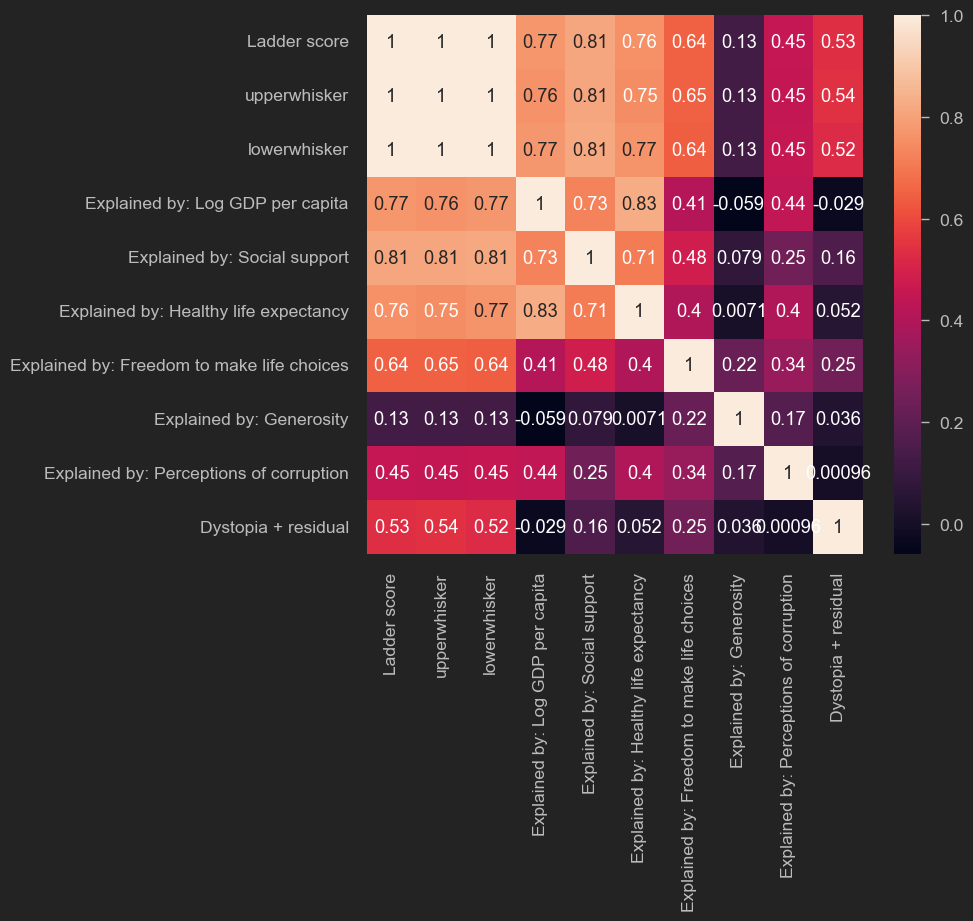

In [39]:
sns.heatmap(corr_matrix, annot=True)

In [40]:
# We are going to create clusters without the use of happiness score and rank to see which countries fall under similar cluster
# Select the data without rank and happiness score
data_df = happy_df.drop(columns = ['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker', 'Dystopia + residual'])
data_df

,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1.844,1.572,0.695,0.859,0.142,0.546
1,1.908,1.520,0.699,0.823,0.204,0.548
2,1.881,1.617,0.718,0.819,0.258,0.182
3,1.878,1.501,0.724,0.838,0.221,0.524
4,1.803,1.513,0.740,0.641,0.153,0.193
...,...,...,...,...,...,...
138,0.534,0.665,0.262,0.473,0.189,0.072
139,0.654,0.566,0.253,0.469,0.181,0.053
140,0.771,0.851,0.000,0.523,0.082,0.085
141,1.377,0.577,0.556,0.173,0.068,0.029


In [42]:
# Scale data before feed to model
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df)
scaled_data

array([[ 1.09824759e+00,  1.31779296e+00,  1.05952459e+00,
         1.47228655e+00, -5.83699669e-02,  3.11542572e+00],
       [ 1.24934158e+00,  1.16122520e+00,  1.08386549e+00,
         1.24994141e+00,  7.88873030e-01,  3.13132568e+00],
       [ 1.18559880e+00,  1.45328428e+00,  1.19948477e+00,
         1.22523640e+00,  1.52679435e+00,  2.21634008e-01],
       [ 1.17851627e+00,  1.10401775e+00,  1.23599611e+00,
         1.34258522e+00,  1.02118159e+00,  2.94052622e+00],
       [ 1.00145300e+00,  1.14014877e+00,  1.33335971e+00,
         1.25863229e-01,  9.19473391e-02,  3.09083758e-01],
       [ 1.23281568e+00,  9.86591932e-01,  1.12646207e+00,
         6.44668545e-01,  1.37647704e+00,  1.73212968e+00],
       [ 1.35321870e+00,  1.15219244e+00,  1.11429162e+00,
         1.32405646e+00,  1.06217722e+00,  2.62252713e+00],
       [ 1.79941814e+00,  6.64423664e-01,  1.13863252e+00,
         1.11406383e+00, -3.70912833e-03,  2.20912832e+00],
       [ 1.39571389e+00,  8.75187952e-01,  1.375

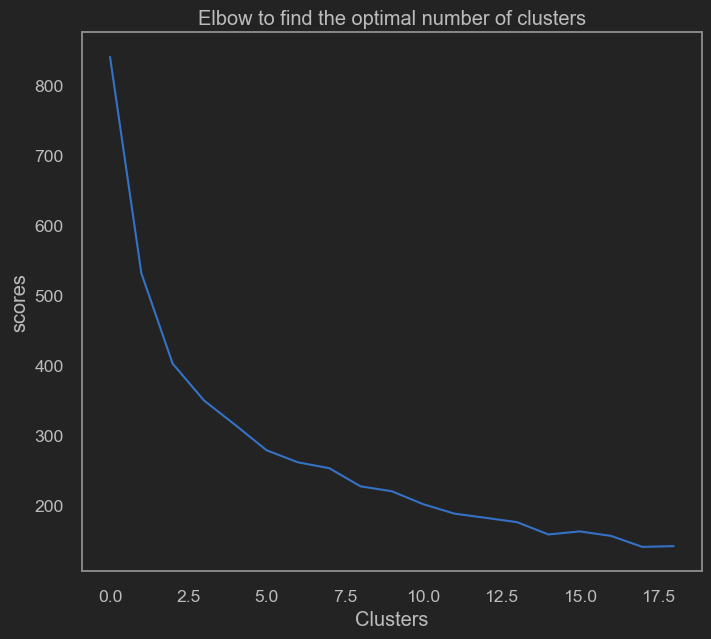

In [45]:
# Usse elbow to find optimal K cluters
scores  = []            # empty list

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    scores.append(kmeans.inertia_)

plt.plot(scores,'bx-')
plt.title('Elbow to find the optimal number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()


In [46]:
# From this we can observe that 3rd cluster seems to be forming the elbow of the curve.
# Let's choose the number of clusters to be 3.
kmeans = KMeans(3)
kmeans.fit(scaled_data)      # find the centroid

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [48]:
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [51]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = data_df.columns )          # Figure 3 centroid
cluster_centers # scaled

,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,0.321694,0.428150,0.365302,0.135642,-0.332623,-0.372296
1,-1.166338,-1.170047,-1.179423,-0.683226,0.134806,-0.337575
2,1.173204,0.860635,1.066370,0.845654,0.750724,1.735773


In [53]:
cluster_centers = scaler.inverse_transform(cluster_centers)         # inverse to normal because we scaled data before so when read scaled -> cant understand
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = data_df.columns )          # Figure 3 centroid
cluster_centers # scaled

,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,0.321694,0.428150,0.365302,0.135642,-0.332623,-0.372296
1,-1.166338,-1.170047,-1.179423,-0.683226,0.134806,-0.337575
2,1.173204,0.860635,1.066370,0.845654,0.750724,1.735773


In [54]:
# Based on centroid we implement assign cluster
cluster = kmeans.fit_predict(scaled_data)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2,
       0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 1], dtype=int32)

In [55]:
happy_df['cluster'] = cluster

In [56]:
happy_df

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,cluster
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,0
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,0
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,0
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,0
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,0
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,2
139,Sierra Leone,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,2
140,Lesotho,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,1
141,Lebanon,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,1


In [60]:
 # Nhóm dữ liệu theo cột 'cluster' và tính giá trị trung bình cho mỗi cột
happy_drop_df =  happy_df.drop(columns = ['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker', 'Dystopia + residual'])
cluster_analysis = happy_drop_df.groupby('cluster').mean()

cluster_analysis

,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
cluster,,,,,,
0,1.642952,1.334167,0.627393,0.694536,0.140190,0.184857
1,1.064407,0.784444,0.351778,0.416407,0.093111,0.115259
2,0.906414,0.881241,0.369828,0.596655,0.213379,0.101276


In [63]:
import plotly.graph_objects as go
from plotly.offline import iplot
# Visualizing the clusters geographically
data = dict(type = 'choropleth',
           locations = happy_df["Country name"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happy_df['cluster'],
           text = happy_df["Country name"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

C:\Users\THANH BINH\AppData\Local\Temp\ipykernel_70016\2867969877.py:15: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [67]:
# Plot the relationship between cluster and score

fig = px.scatter(happy_df, x = 'cluster', y = "Ladder score",
            color = "Country name", hover_name = "Country name",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()